【課程名稱】<font color=#FF0000>機器學習(Machine Learning, ML)</font><br>
【授課講師】[陳祥輝 (mail : HsiangHui.Chen@gmail.com)](mailto:HsiangHui.Chen@gmail.com)<br>
【facebook】[陳祥輝老師的臉書 (歡迎加好友)](https://goo.gl/osivhx)<br>
【相關課程】[東吳推廣數位資訊學苑陳祥輝老師的課程表](https://www.ext.scu.edu.tw/courses_search.php?key=陳祥輝)<br>

In [1]:
# -*- coding: utf-8 -*-

from platform import python_version
import os, time, glob, socket
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.utils import resample
from collections import Counter

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【Python】{}".format(python_version()))

【日期時間】2025/03/14 19:38:00
【工作目錄】C:\Users\NTPU\Downloads
【主機名稱】502-12 (10.100.52.12)
【Python】3.12.4


In [2]:
from matplotlib.font_manager import FontProperties  
winfont01 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) 
winfont02 = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=12) 

# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定字型為微軟正黑體
# plt.rcParams['axes.unicode_minus'] = False                # 解決負號顯示問題

# macfont = FontProperties(fname="/Library/Fonts/Arial Unicode.ttf", size=10) 

【抽樣方法】<https://zh.wikipedia.org/wiki/抽樣>
- 簡單隨機抽樣
- 系統抽樣
- 分層抽樣
- 整群抽樣

### <font color='red'>(一)抽樣(sampling)</font>

### <font color='blue'>【資料集】1.鳶尾花</font>

In [4]:
fname = r'C:/Data/PyMLData/iris.csv'
iris = pd.read_csv(fname, sep=',', encoding='utf-8', engine='python')
print(iris.shape)
iris.head(3)

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [5]:
iris["Species"].value_counts()         # pd.Series 可以使用 .value_counts() , Counter() 也可以

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
Counter(iris["Species"])               # np.ndarray 一定要使用 Counter 不能用.value_counts() 

Counter({'setosa': 50, 'versicolor': 50, 'virginica': 50})

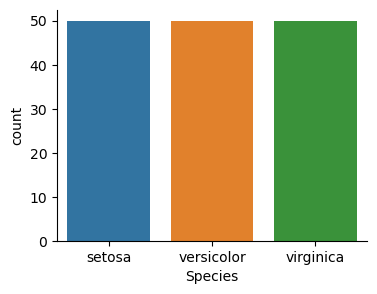

In [7]:
plt.figure(figsize=[4, 3])

sns.countplot(data=iris, x="Species", hue="Species")         # 分色系的依據

ax = plt.gca()   # get current axe
ax.spines["top"].set_visible(False)    # 刪除上邊那條線
ax.spines["right"].set_visible(False)    # 刪除右邊那條線

plt.show()

In [19]:
# 把x y 定義好
X = iris.drop(labels=["Species"], axis=1, inplace=False).to_numpy()
y = iris["Species"].to_numpy()

print(Counter(y))

Counter({'setosa': 50, 'versicolor': 50, 'virginica': 50})


> #### 隨機抽樣

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,      # int : 筆數，float : 百分比
                                                    train_size=None,    # test_size, train_size 只能擇一設定
                                                    random_state=None,  # seed
                                                    shuffle=True,       # 是否打亂資料順序
                                                    stratify=None,)     # 分層的依據 這裡沒有填寫下面出來的數據又會三個不一定一樣
print(Counter(y_train))

Counter({'versicolor': 42, 'setosa': 40, 'virginica': 38})


> #### 分層抽樣

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,      # int : 筆數，float : 百分比
                                                    train_size=None,    # test_size, train_size 只能擇一設定
                                                    random_state=None,  # seed
                                                    shuffle=True,       # 是否打亂資料順序
                                                    stratify=y,)        # 分層的依據 這裡我想以y分層 這樣數據的資料會都一樣
print(Counter(y_train))

Counter({'setosa': 40, 'virginica': 40, 'versicolor': 40})


### <font color='blue'>【資料集】2.可食性蘑菇或毒蘑菇</font>

In [30]:
fname = r'C:/Data/PyMLData/mushrooms.csv'
mushrooms = pd.read_csv(fname, sep=',', encoding='utf-8', engine='python')

### <font color='blue'>sklearn.utils.resample</font>
- resample(*arrays, replace=True, n_samples=None, random_state=None, stratify=None, )
- The default strategy implements one step of the bootstrapping procedure.

### <font color='blue'>【資料集】1.鳶尾花</font>

In [ ]:
from sklearn.utils import resample

In [ ]:
fname = r'C:/Data/PyMLData/iris.csv'
iris = pd.read_csv(fname, sep=',', encoding='utf-8', engine='python')

### <font color='blue'>【資料集】2.可食性蘑菇或毒蘑菇</font>

In [26]:
from sklearn.utils import resample
fname = r'C:/Data/PyMLData/mushrooms.csv'
mushrooms = pd.read_csv(fname, sep=',', encoding='utf-8', engine='python')
print(mushrooms.shape)
mushrooms.head(3)

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


> #### 從資料集中抽出不放回，使用時機，大樣本 抽出 小樣本

In [27]:
df = resample(mushrooms, 
              replace=False,            # 抽出是否放回
              n_samples=1000,           # 抽出來的筆數
              random_state=None,        # seed
              stratify=None,)           # 分層依據
print(df.shape)

(1000, 23)


> #### 從資料集中抽出放回，使用時機，小樣本 抽出 大樣本 : bootstrap 拔靴法

In [28]:
df = resample(mushrooms, 
              replace=True,             # 抽出是否放回
              n_samples=50000,          # 抽出來的筆數
              random_state=None,        # seed
              stratify=None,)           # 分層依據
print(df.shape)

(50000, 23)


### <font color='red'>(二)標準化</font>
標準化的常用方式：
- min max normalization：
    - 會將特徵數據按比例縮放至某一個區間，例如 : [0, 1] or [-1, 1]
    - 以 [0, 1] 為例 : $x_{new} = \frac{x - min}{max - min}$
- standard deviation normalization：
    - 會將特徵數據縮放成平均值為0、標準差為1的標準常態分配
    - $\frac{(x - \mu)}{\sigma}$

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
fname = r'C:/Data/PyMLData/iris.csv'
iris = pd.read_csv(fname, sep=',', encoding='utf-8', engine='python')

X = iris.drop(labels=["Species"], axis=1, inplace=False).to_numpy()
y = iris["Species"].to_numpy()

iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### sklearn.preprocessing.StandardScaler 類別

In [32]:
scaler = StandardScaler()  # 幾倍標準差
scaler.fit(X)
X_new = scaler.transform(X)
# X_new = scaler.fit_transform(X)  # 上面兩行也可以把他們合併一下!

print("【轉換後】")
print(X_new[:5])

print("【轉換回原本】")
X_orig = scaler.inverse_transform(X_new)
print(X_orig[:5])

【轉換後】
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
【轉換回原本】
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


#### sklearn.preprocessing.MinMaxScaler 類別

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))  # 輸出結果都要在0 1 之間
scaler.fit(X)
X_new = scaler.transform(X)
# X_new = scaler.fit_transform(X)  # 上面兩行也可以把他們合併一下!

print("【轉換後】")
print(X_new[:5])

print("【轉換回原本】")
X_orig = scaler.inverse_transform(X_new)
print(X_orig[:5])

【轉換後】
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]
【轉換回原本】
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### <font color='red'> 比較 X變數 沒有標準化 與 有標準化 的差異，以及 特徵重要性 (Feature Importance)</font>

In [36]:
from sklearn.linear_model import LinearRegression
fname = r'C:/Data/PyMLData/mtcars.csv'
mtcars = pd.read_csv(fname, sep=',', encoding='utf-8', engine='python')

X = mtcars.drop(labels=["mpg"], axis=1, inplace=False).to_numpy()
y = mtcars["mpg"].to_numpy()

mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [39]:
from pprint import pprint
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
coef_list = list()
model = LinearRegression()

for idx in [0, 1] :
    if idx == 0 :                   # X 沒有標準化
        X_new = X.copy()
    else :                          # X 有標準化(MinMax)
        X_new = X_minmax.copy()

    model.fit(X_new, y)  # 這裡的Y必須要是述職的資料 不能是STRING 如果是STRING會抱錯
    coef_list.append(model.coef_)

pprint(coef_list)  # 讓他print出來比較漂亮

[array([-0.11144048,  0.01333524, -0.02148212,  0.78711097, -3.71530393,
        0.82104075,  0.31776281,  2.52022689,  0.65541302, -0.19941925]),
 array([ -0.44576191,   5.34609768,  -6.07943967,   1.70803081,
       -14.53055366,   6.8967423 ,   0.31776281,   2.52022689,
         1.31082603,  -1.39593478])]


In [40]:
df = pd.DataFrame(zip(mtcars.columns[1:], abs(coef_list[0])), columns=["colName", "coef"])
df.sort_values(by="coef", ascending=False, inplace=True)
df

,colName,coef
4,wt,3.715304
7,am,2.520227
5,qsec,0.821041
3,drat,0.787111
8,gear,0.655413
6,vs,0.317763
9,carb,0.199419
0,cyl,0.111440
2,hp,0.021482
1,disp,0.013335


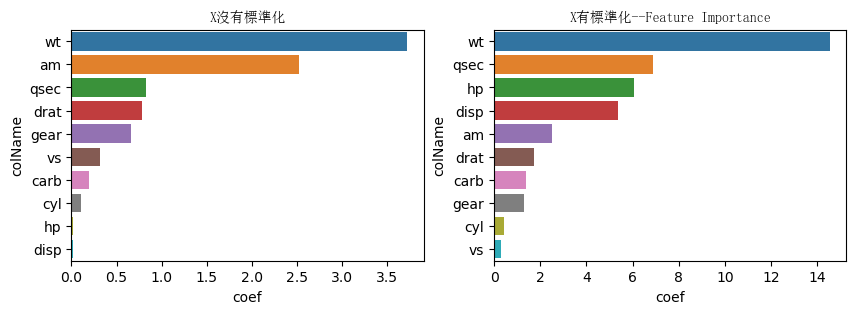

In [42]:
plt.figure(figsize=[10, 3])

for idx in [0, 1] :
    df = pd.DataFrame(zip(mtcars.columns[1:], abs(coef_list[idx])), columns=["colName", "coef"])
    df.sort_values(by="coef", ascending=False, inplace=True)
    plt.subplot(1, 2, idx+1)
    sns.barplot(data=df, x="coef", y="colName", orient="h", hue="colName")
    if idx == 0 :
        plt.title("X沒有標準化", fontproperties=winfont01, fontsize=10)
    else :
        plt.title("X有標準化--Feature Importance", fontproperties=winfont01, fontsize=10)
plt.show()

有沒有標準化 參數的順序是有改變的